<a href="https://colab.research.google.com/github/AdityaAVG/Pokemon_img_classifcation/blob/main/Pokemon_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Identifying which pokemon is that.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image  # This is image module which performs image related functionalities like loading or converting rgb to grey etc.

In [3]:
!wget https://www.dropbox.com/scl/fo/oi9huerppteppcz5t5b32/AJ_ykZC9n5AA0BJat_LlnYI?rlkey=uas4cay1272poo2jc6gf0n5rp&e=2&st=7v2lw3ud O -data

/bin/bash: line 1: O: command not found
--2024-08-22 13:46:14--  https://www.dropbox.com/scl/fo/oi9huerppteppcz5t5b32/AJ_ykZC9n5AA0BJat_LlnYI?rlkey=uas4cay1272poo2jc6gf0n5rp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20cddf5d11b1af7450fcf7cfa3.dl.dropboxusercontent.com/zip_download_get/B8iemyetqkQq27xpdDvdBobhbSPjGEECdDUVTdEgGdoReaQz700Zi-oj5KvzfLr3ChqXU83ijnAmMzD1OgwBUCk6o4kuijlQIXn4e7GmIoitMg# [following]
--2024-08-22 13:46:16--  https://uc20cddf5d11b1af7450fcf7cfa3.dl.dropboxusercontent.com/zip_download_get/B8iemyetqkQq27xpdDvdBobhbSPjGEECdDUVTdEgGdoReaQz700Zi-oj5KvzfLr3ChqXU83ijnAmMzD1OgwBUCk6o4kuijlQIXn4e7GmIoitMg
Resolving uc20cddf5d11b1af7450fcf7cfa3.dl.dropboxusercontent.com (uc20cddf5d11b1af7450fcf7cfa3.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6057:15::a27d:d0f
Connecting t

In [6]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Tra

In [7]:
classes= os.listdir("images/Train")
classes

['Charmander', 'Bulbasaur', 'Pikachu']

In [8]:
print("Training Data:")
for f in classes:
  path =os.listdir('images/Train/'+f)
  print(f"{f} - {len(path)}")

Training Data:
Charmander - 102
Bulbasaur - 101
Pikachu - 101


In [9]:
print("Test Data:")
for f in classes:
  path =os.listdir('images/Test/'+f)
  print(f"{f} - {len(path)}")

Test Data:
Charmander - 42
Bulbasaur - 41
Pikachu - 40


In [10]:
# Data is not structured properly(because it is in the folder format rn) so we need to structure it properly i.e X as input data and Y as output data
#X will the shape have no. of examples X no. of features
# In this since we are using Images ,so the size of X will be (no. of images,no. of pixels) .Here each pixel will be represented as a feature.
# To ensure the proper number of pixels , we will keep it to size 100 x 100.

In [11]:
## Data Loading

In [12]:
train_data=[] # X
train_labels=[] #y

In [13]:
"""path=os.listdir("images/Train/Pikachu/")
for f in path:
  img_path="images/Train/Pikachu/"+f
  img=image.load_img(img_path,target_size=(100,100))
  img=image.img_to_array(img)
  train_data.append(img)"""

'path=os.listdir("images/Train/Pikachu/")\nfor f in path:\n  img_path="images/Train/Pikachu/"+f\n  img=image.load_img(img_path,target_size=(100,100))\n  img=image.img_to_array(img)\n  train_data.append(img)'

In [14]:
classes= os.listdir("images/Train")
for category in classes:
  folder=os.listdir("images/Train/" + category)
  path=f"images/Train/{category}"
  #print(path)
  #print(category)
  for f in folder:
    img_path=path + "/" + str(f)
    img=image.load_img(img_path,target_size=(100,100))
    img=image.img_to_array(img)
    train_data.append(img)
    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(train_data)

304

In [16]:
len(train_labels)

304

In [17]:
#Now the data is in the form of array and not as an image but is in structured form i.e all the images with labels together .

##Data Preprocessing

In [18]:
train_data=np.array(train_data)
train_labels=np.array(train_labels)

In [19]:
train_data.shape # X i.e train_data is still not in the m X n shape .So next task is to convert it into (304 X 30000) where m is no. of images and n is the no. of features (pixels here ).30000 = 3 x100 x 100.

(304, 100, 100, 3)

In [20]:
train_labels.shape

(304,)

In [21]:
train_data = train_data.reshape(len(train_data),-1)
train_data.shape

(304, 30000)

In [22]:
train_labels  #It is in the text format and ML does not take data in text format. We need to convert that text into numbers as labels like 0,1,2.

array(['Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charm

In [23]:
category2label = {'Pikachu':0,'Bulbasaur':1,'Charmander':2}
label2category={0 :'Pikachu',1 :'Bulbasaur',2 :'Charmander'}

In [24]:
train_labels=np.array([category2label[label] for label in train_labels])


In [25]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)

In [26]:
train_labels.shape

(304, 3)

## Building a model

In [27]:
train_labels.shape

(304, 3)

In [28]:
# Our last neural layer will have 3 neurons because there are 3 categories or classes in the datasets.

## Model Architecture

In [29]:
from torch.nn import Linear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
features=train_data.shape[1]

In [31]:
model=Sequential()
model.add(Dense(units=512,activation='relu',input_shape=(features,)))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=3,activation='softmax'))  # 3 channels becuase only  3 categories are there.

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  # Built the model now need to train it .

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │      15,360,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,533,187 (59.25 MB)

 Trainable params: 15,533,187 (59.25 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#Lets train our model
model.fit(train_data,train_labels,batch_size=32,epochs=50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 342ms/step - accuracy: 0.3449 - loss: 2304.4153
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.3860 - loss: 958.6425
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.5637 - loss: 333.4138
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.7042 - loss: 256.3816
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - accuracy: 0.5735 - loss: 257.1692
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.7883 - loss: 93.9266
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.8934 - loss: 29.2084
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.7844 - loss: 93.1212
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 0.8347 - loss: 89.6010
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.8737 - loss: 59.0402
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.7979 - loss: 102.1203
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━

Test

In [37]:
test_data=[] # X
test_labels=[] #y

In [38]:
classes= os.listdir("images/Test")
for category in classes:
  folder=os.listdir("images/Test/" + category)
  path=f"images/Test/{category}"
  #print(path)
  #print(category)
  for f in folder:
    img_path=path + "/" + str(f)
    img=image.load_img(img_path,target_size=(100,100))
    img=image.img_to_array(img)
    test_data.append(img)
    test_labels.append(category)

In [40]:
test_labels = np.array([category2label[label] for label in test_labels])

In [41]:
test_labels = to_categorical(test_labels)

In [45]:
test_labels.shape

(123, 3)

In [43]:
test_data = np.array(test_data)
test_data = test_data.reshape(len(test_data),-1)

In [46]:
test_data.shape

(123, 30000)

In [48]:
model.evaluate(test_data,test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9682 - loss: 17.6193


[18.843364715576172, 0.9674796462059021]

In [51]:
model.predict(test_data).round(2) #This gives the probability of each category for every images.This is done for every image.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
 

In [52]:
pred = np.argmax(model.predict(test_data),axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [53]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
#We will convert labels in no. to name

In [55]:
test_labels=[label2category[p] for p in pred]

In [56]:
test_labels


['Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasau

## Prediction

In [83]:
test_img="/content/images/Test/Charmander/2200.jpg"  #You can input any image from the data to make it work. Just be careful about the path.

In [84]:
img=image.load_img(test_img,target_size=(100,100))  #Remember to convert image to array and before that resize the image in ceratain pixels .
img=image.img_to_array(img)
img.shape

(100, 100, 3)

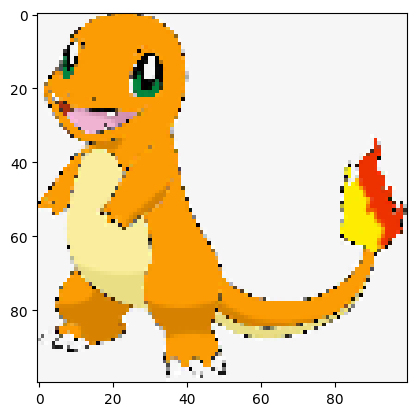

In [85]:
#Lets see what image we have choosen.
plt.imshow(img.astype('uint8'))

In [86]:
#Also we need to provide image with 30k features or pixels .
img=img.reshape(1,-1)
img.shape

(1, 30000)

In [87]:
model.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0., 0., 1.]], dtype=float32)

In [88]:
pred=np.argmax(model.predict(img),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [82]:
label2category[pred[0]]

'Charmander'